In [1]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg 
from matplotlib.figure import Figure 
from pandas import DataFrame as df
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
csv_data = pd.read_csv("2016to2018Movie.csv",encoding='euc-kr')
matplotlib.use('TkAgg') 
import json
import os
from pprint import pprint
with open('train_docs.json' ,encoding="utf-8") as f:
    train_docs = json.load(f)
with open('test_docs.json', encoding="utf-8") as f:
    test_docs = json.load(f)
font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
from pprint import pprint

In [2]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2232216


In [3]:
from konlpy.tag import Okt

okt = Okt()

In [4]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [5]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [6]:
selected_words = [f[0] for f in text.vocab().most_common(5000)]

In [ ]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [8]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 149999 samples
Epoch 1/10
149999/149999 [==============================] - 26s 173us/sample - loss: 0.2127 - binary_accuracy: 0.9193
Epoch 2/10
149999/149999 [==============================] - 28s 184us/sample - loss: 0.1545 - binary_accuracy: 0.9414
Epoch 3/10
149999/149999 [==============================] - 28s 185us/sample - loss: 0.1406 - binary_accuracy: 0.9473
Epoch 4/10
149999/149999 [==============================] - 27s 183us/sample - loss: 0.1295 - binary_accuracy: 0.9524
Epoch 5/10
149999/149999 [==============================] - 28s 183us/sample - loss: 0.1196 - binary_accuracy: 0.9566
Epoch 6/10
149999/149999 [==============================] - 28s 184us/sample - loss: 0.1099 - binary_accuracy: 0.9608
Epoch 7/10
149999/149999 [==============================] - 28s 184us/sample - loss: 0.1005 - binary_accuracy: 0.9639
Epoch 8/10
149999/149999 [==============================] - 28s 185us/sample - loss: 0.0919 - binary_accuracy: 0.9680
Epoch 9/10
149999/149999 [======

In [10]:
results

[0.1629805234155059, 0.94374]

In [11]:
csv_data_quarter1 = csv_data[((csv_data["개봉일"]>180000) & (csv_data["개봉일"]<180400))|((csv_data["개봉일"]>170000) & (csv_data["개봉일"]<170400))|((csv_data["개봉일"]>160000) & (csv_data["개봉일"]<160400))]
csv_data_quarter2 = csv_data[((csv_data["개봉일"]>180400) & (csv_data["개봉일"]<180700))|((csv_data["개봉일"]>170400) & (csv_data["개봉일"]<170700))|((csv_data["개봉일"]>160400) & (csv_data["개봉일"]<160700))]
csv_data_quarter3 = csv_data[((csv_data["개봉일"]>180700) & (csv_data["개봉일"]<181000))|((csv_data["개봉일"]>170700) & (csv_data["개봉일"]<171000))|((csv_data["개봉일"]>160700) & (csv_data["개봉일"]<161000))]
csv_data_quarter4 = csv_data[((csv_data["개봉일"]>181000) & (csv_data["개봉일"]<181231))|((csv_data["개봉일"]>171000) & (csv_data["개봉일"]<171231))|((csv_data["개봉일"]>161000) & (csv_data["개봉일"]<161231))]
csv_data_2016= csv_data[((csv_data["개봉일"]>160000) & (csv_data["개봉일"]<170000))]
csv_data_2017= csv_data[((csv_data["개봉일"]>170000) & (csv_data["개봉일"]<180000))]
csv_data_2018= csv_data[((csv_data["개봉일"]>180000) & (csv_data["개봉일"]<190000))]

In [12]:
count_qa1_act=0
count_qa1_adv=0
count_qa1_dra=0
count_qa1_hor=0
count_qa1_rom=0
for i in csv_data_quarter1["장르"]:
    if(i=="모험"):
        count_qa1_adv=count_qa1_adv+1
    elif(i=="액션"):
        count_qa1_act=count_qa1_act+1
    elif(i=="드라마"):
        count_qa1_dra=count_qa1_dra+1
    elif(i=="공포"):
        count_qa1_hor=count_qa1_hor+1
    else:
        count_qa1_rom=count_qa1_rom+1
labels = ['모험', '액션', '드라마', '호러', '로맨스']
qua1_ratio = [ count_qa1_adv,  count_qa1_act,  count_qa1_dra,  count_qa1_hor, count_qa1_rom]
count_qa2_act=0
count_qa2_adv=0
count_qa2_dra=0
count_qa2_hor=0
count_qa2_rom=0
for i in csv_data_quarter2["장르"]:
    if(i=="모험"):
        count_qa2_adv=count_qa2_adv+1
    elif(i=="액션"):
        count_qa2_act=count_qa2_act+1
    elif(i=="드라마"):
        count_qa2_dra=count_qa2_dra+1
    elif(i=="공포"):
        count_qa2_hor=count_qa2_hor+1
    else:
        count_qa2_rom=count_qa2_rom+1
qua2_ratio = [ count_qa2_adv,  count_qa2_act,  count_qa2_dra,  count_qa2_hor, count_qa2_rom]
count_qa3_act=0
count_qa3_adv=0
count_qa3_dra=0
count_qa3_hor=0
count_qa3_rom=0
for i in csv_data_quarter3["장르"]:
    if(i=="모험"):
        count_qa3_adv=count_qa3_adv+1
    elif(i=="액션"):
        count_qa3_act=count_qa3_act+1
    elif(i=="드라마"):
        count_qa3_dra=count_qa3_dra+1
    elif(i=="공포"):
        count_qa3_hor=count_qa3_hor+1
    else:
        count_qa3_rom=count_qa3_rom+1
qua3_ratio = [ count_qa3_adv,  count_qa3_act,  count_qa3_dra,  count_qa3_hor, count_qa3_rom]
count_qa4_act=0
count_qa4_adv=0
count_qa4_dra=0
count_qa4_hor=0
count_qa4_rom=0
for i in csv_data_quarter4["장르"]:
    if(i=="모험"):
        count_qa4_adv=count_qa4_adv+1
    elif(i=="액션"):
        count_qa4_act=count_qa4_act+1
    elif(i=="드라마"):
        count_qa4_dra=count_qa4_dra+1
    elif(i=="공포"):
        count_qa4_hor=count_qa4_hor+1
    else:
        count_qa4_rom=count_qa4_rom+1
qua4_ratio = [ count_qa4_adv,  count_qa4_act,  count_qa4_dra,  count_qa4_hor, count_qa4_rom]

In [13]:
count_2016_act=0
count_2016_adv=0
count_2016_dra=0
count_2016_hor=0
count_2016_rom=0
for i in csv_data_2016["장르"]:
    if(i=="모험"):
        count_2016_adv=count_2016_adv+1
    elif(i=="액션"):
        count_2016_act=count_2016_act+1
    elif(i=="드라마"):
        count_2016_dra=count_2016_dra+1
    elif(i=="공포"):
        count_2016_hor=count_2016_hor+1
    else:
        count_2016_rom=count_2016_rom+1
labels = ['모험', '액션', '드라마', '호러', '로맨스']
ratio_2016 = [ count_2016_adv,  count_2016_act,  count_2016_dra,  count_2016_hor, count_2016_rom]
count_2017_act=0
count_2017_adv=0
count_2017_dra=0
count_2017_hor=0
count_2017_rom=0
for i in csv_data_2017["장르"]:
    if(i=="모험"):
        count_2017_adv=count_2017_adv+1
    elif(i=="액션"):
        count_2017_act=count_2017_act+1
    elif(i=="드라마"):
        count_2017_dra=count_2017_dra+1
    elif(i=="공포"):
        count_2017_hor=count_2017_hor+1
    else:
        count_2017_rom=count_2017_rom+1
labels = ['모험', '액션', '드라마', '호러', '로맨스']
ratio_2017 = [ count_2017_adv,  count_2017_act,  count_2017_dra,  count_2017_hor, count_2017_rom]
count_2018_act=0
count_2018_adv=0
count_2018_dra=0
count_2018_hor=0
count_2018_rom=0
for i in csv_data_2018["장르"]:
    if(i=="모험"):
        count_2018_adv=count_2018_adv+1
    elif(i=="액션"):
        count_2018_act=count_2018_act+1
    elif(i=="드라마"):
        count_2018_dra=count_2018_dra+1
    elif(i=="공포"):
        count_2018_hor=count_2018_hor+1
    else:
        count_2018_rom=count_2018_rom+1
labels = ['모험', '액션', '드라마', '호러', '로맨스']
ratio_2018 = [ count_2018_adv,  count_2018_act,  count_2018_dra,  count_2018_hor, count_2018_rom]
x = [5,8,11,14,17]
y = [6,9,12,15,18]
z = [7,10,13,16,19]

In [14]:
count_in=0
count_out=0;
for i in csv_data["대표국적"]:
    if(i=="한국"):
        count_in=count_in+1
    else:
        count_out=count_out+1
ratio = [count_in,count_out]
movie_label=['국내','국외']

In [15]:
linear_regression1 = linear_model.LinearRegression()
linear_regression1.fit(X=pd.DataFrame(csv_data["관람객평점"]), y = csv_data["관객수"])
prediction1 = linear_regression1.predict(X = pd.DataFrame(csv_data["관람객평점"]))
linear_regression2 = linear_model.LinearRegression()
linear_regression2.fit(X=pd.DataFrame(csv_data["평론가평점"]), y = csv_data["관객수"])
prediction2 = linear_regression2.predict(X = pd.DataFrame(csv_data["평론가평점"]))
linear_regression3 = linear_model.LinearRegression()
linear_regression3.fit(X=pd.DataFrame(csv_data["네티즌평점"]), y = csv_data["관객수"])
prediction3 = linear_regression3.predict(X = pd.DataFrame(csv_data["네티즌평점"]))
linear_regression4 = linear_model.LinearRegression()
linear_regression4.fit(X=pd.DataFrame(csv_data["남자평점"]), y = csv_data["관객수"])
prediction4 = linear_regression4.predict(X = pd.DataFrame(csv_data["남자평점"]))
linear_regression5 = linear_model.LinearRegression()
linear_regression5.fit(X=pd.DataFrame(csv_data["여자평점"]), y = csv_data["관객수"])
prediction5 = linear_regression5.predict(X = pd.DataFrame(csv_data["여자평점"]))

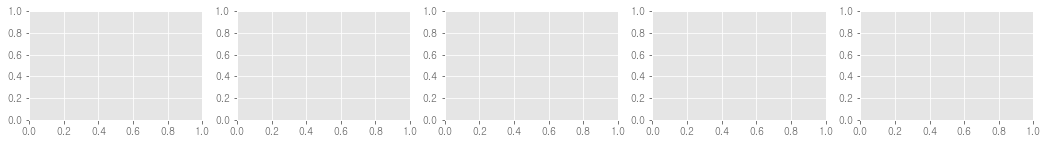

In [16]:
fig1 = plt.figure(figsize=(18,2)) 
ax1 = fig1.add_subplot(1, 5, 1)
ax2 = fig1.add_subplot(1, 5, 2)
ax3 = fig1.add_subplot(1, 5, 3)
ax4 = fig1.add_subplot(1, 5, 4)
ax5 = fig1.add_subplot(1, 5, 5)

In [17]:
t1 = csv_data["관람객평점"]
t2 = csv_data["평론가평점"]
t3 = csv_data["네티즌평점"]
t4 = csv_data["남자평점"]
t5 = csv_data["여자평점"]
s = csv_data["관객수"]
ax1.scatter(t1,s) 
ax1.plot(csv_data["관람객평점"],prediction1,color="blue")
ax1.set_xlabel('관람객평점', size=10)
ax1.set_ylabel('관객수', size=15)
ax2.scatter(t2,s) 
ax2.plot(csv_data["평론가평점"],prediction2,color="blue")
ax2.set_xlabel('평론가평점', size=10)
ax3.scatter(t3,s) 
ax3.plot(csv_data["네티즌평점"],prediction3,color="blue")
ax3.set_xlabel('네티즌평점', size=10)
ax4.scatter(t4,s) 
ax4.plot(csv_data["남자평점"],prediction4,color="blue")
ax4.set_xlabel('남자평점', size=10)
ax5.scatter(t5,s) 
ax5.plot(csv_data["여자평점"],prediction5,color="blue")
ax5.set_xlabel('여자평점', size=10)

Text(0.5, 3.1999999999999993, '여자평점')

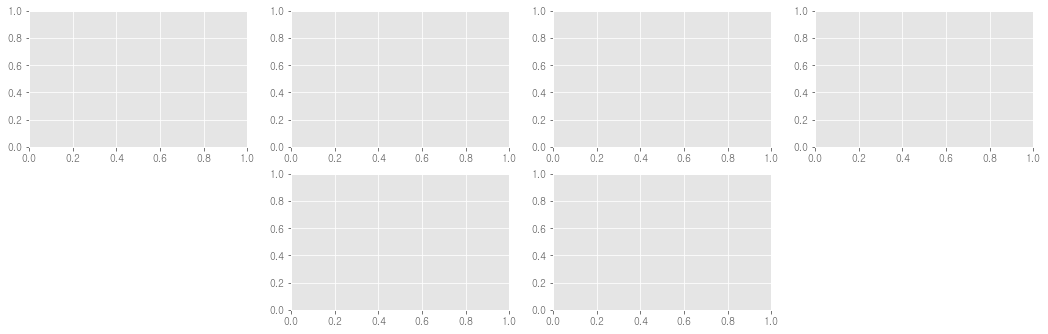

In [18]:
fig2 = plt.figure(figsize=(18,5.5)) 
axs1 = fig2.add_subplot(2, 4, 1)
axs2 = fig2.add_subplot(2, 4, 2)
axs3 = fig2.add_subplot(2, 4, 3)
axs4 = fig2.add_subplot(2, 4, 4)
axs5= fig2.add_subplot(2, 4, 6)
axs6= fig2.add_subplot(2, 4, 7)

In [19]:
axs1.pie(qua1_ratio, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
axs1.set_xlabel('1분기 비율', size=10)
axs2.pie(qua2_ratio, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
axs2.set_xlabel('2분기 비율', size=10)
axs3.pie(qua3_ratio, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
axs3.set_xlabel('3분기 비율', size=10)
axs4.pie(qua4_ratio, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
axs4.set_xlabel('4분기 비율', size=10)
axs5.bar(z,ratio_2016 ,label='2016' ,color = 'r')
axs5.bar(y,ratio_2017 ,label='2017' ,color = 'g')
axs5.bar(x,ratio_2018 ,label='2018' ,color = 'b')
axs5.axes.get_xaxis().set_ticks([])
axs5.set_xlabel("모험    액션    드라마    공포    로맨스")
axs5.legend()
axs5.set_xlabel('년도별 장르 편수', size=10)
axs6.pie(ratio, labels=movie_label, shadow=True, startangle=90,autopct='%1.1f%%')
axs6.set_xlabel('국내 국외 영화 비율', size=10)

Text(0.5, 3.200000000000003, '국내 국외 영화 비율')

In [20]:
import pandas as pd
from pandas import DataFrame as df
csv_data1 = pd.read_csv("adv_review1.csv",encoding='euc-kr')
csv_data2 = pd.read_csv("adv_review2.csv",encoding='euc-kr')

In [21]:
def predict_score(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        return 1
    else:
        return 0

In [22]:
k=[]
sumk=0;
for i in csv_data2["text"]:
    k.append(predict_score(i))
for q in k:
    sumk = sumk+q
last = [sumk,len(k)-sumk]

In [23]:
l=[]
suml=0;
for i in csv_data1["text"]:
    l.append(predict_score(i))
for q in l:
    suml = suml+q
first = [suml,len(l)-suml]

In [24]:
first

[13469, 6515]

In [25]:
percentlabel = ["긍정","부정"]

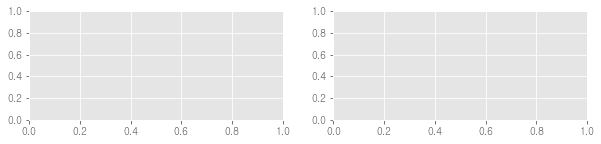

In [26]:
fig3 = plt.figure(figsize=(10,2)) 
axe1 = fig3.add_subplot(1, 2, 1)
axe2 = fig3.add_subplot(1, 2, 2)

In [27]:
axe1.pie(first, labels=percentlabel, shadow=True, startangle=90,autopct='%1.1f%%')
axe1.set_xlabel('최상위 영화', size=10)
axe2.pie(last, labels=percentlabel, shadow=True, startangle=90,autopct='%1.1f%%')
axe2.set_xlabel('최하위 영화', size=10)

Text(0.5, 3.1999999999999993, '최하위 영화')

In [28]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        a = "[{}]는 {:.2f}% 의 긍정력이 느껴져요! \n".format(review, score * 100)
    else:
        a = "[{}]는 {:.2f}% 의 부정력이 느껴져요! \n".format(review, (1 - score) * 100)
    return a

In [29]:
from tkinter import *
from tkinter import ttk

root = Tk()
root.title("Positive or Negative")
root.geometry("1300x1500")


canvas = FigureCanvasTkAgg(fig1, master=root) 
plot_widget = canvas.get_tk_widget() 
canvas2 = FigureCanvasTkAgg(fig2, master=root) 
plot_widget2 = canvas2.get_tk_widget() 
canvas3 = FigureCanvasTkAgg(fig3, master=root) 
plot_widget3 = canvas3.get_tk_widget() 
def clickMe():
    k = predict_pos_neg(str.get())
    print(k)
    messagebox.showinfo("Button Clicked", k)


label1=ttk.Label(root, text="   관객수와 평점과의 관계 ")
label1.grid(row=0,column=0)
plot_widget.grid(row=1,  columnspan=1) 
label2=ttk.Label(root, text="   대시보드 ")
label2.grid(row=2,column=0)
plot_widget2.grid(row=3,  columnspan=1) 
str = StringVar()
textbox = ttk.Entry(root, width=100, textvariable=str)
label3=ttk.Label(root, text="   최상위 영화와 최하위 영화의 감정 %  ")
label3.grid(row=4,column=0)
plot_widget3.grid(row=5,  columnspan=1) 


textbox.grid(row = 6 , columnspan=1)

button1 = ttk.Button(root,text="calculate",command=clickMe)
button1.grid(row=7,column=0)

root.mainloop()

[김충 식 바보]는 95.57% 의 부정력이 느껴져요! 

[이영화 진짜 너무꿀잼이에요 ㅋㅋㅋ ]는 99.67% 의 긍정력이 느껴져요! 

[ㅡㅡ]는 91.77% 의 부정력이 느껴져요! 

[재미있는데 별로임 ㅡㅡ ]는 94.98% 의 부정력이 느껴져요! 

[재미있는데 별로임 ]는 80.87% 의 부정력이 느껴져요! 

[생각보다 별로에요 ]는 97.61% 의 부정력이 느껴져요! 

[생각보다 별로에요  근데 내용은 괜찮았어요 ]는 63.28% 의 부정력이 느껴져요! 

[노문택 ]는 68.06% 의 긍정력이 느껴져요! 

[이영화 느낌좋고 스토리 탄탄합니다. ]는 99.52% 의 긍정력이 느껴져요! 

[연성대학교 ]는 68.06% 의 긍정력이 느껴져요! 

[영화 스토리 구성이 정말 좋네요! ]는 98.95% 의 긍정력이 느껴져요! 

[스토리도 별로고 정말 완전 기대 이하네요 ㅡㅡ]는 99.99% 의 부정력이 느껴져요! 

[스토리별로 영화는 느낌이 좋음 ]는 68.42% 의 부정력이 느껴져요! 

